In [1]:
# 딥러닝......
# 파이토치, 텐서플로, 케라스
# 영상분류를 할때는.. ImageNet이라는 데이터베이스....
# ILSVRC대회 - 이미지 분류대회  RestNet이 우승... 2015
# 대표적인 딥러닝 소프트웨어
# 텐서플로 : 기업
# 파이토치 : 대학


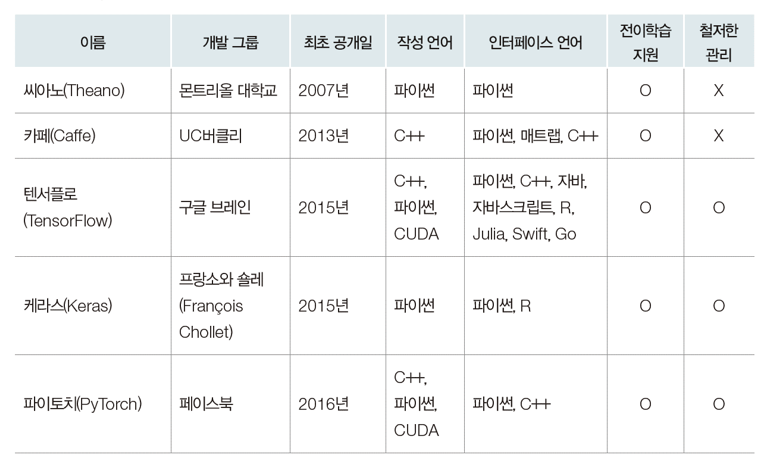

In [2]:
# https://en.wikipedia.org/wiki/Comparison_of_deep_learning_software
from IPython.display import Image
Image("https://raw.githubusercontent.com/bigdataleeky/python/main/image/32.PNG", width=500)

In [3]:
# 다차원 배열을 텐서
# 데이터를 텐서
# 신경망의 가중치(매개변수)를 텐서로 표현
# 특징 벡터의 차원과 텐서의 차원을 구별
# iris에서 샘플 하나 == (꽃받침의 길이,너비,꽃잎의 길이,너비) --> 특징 벡터  4차원
# 1차원 구조의 텐서 -> 1차원 텐서

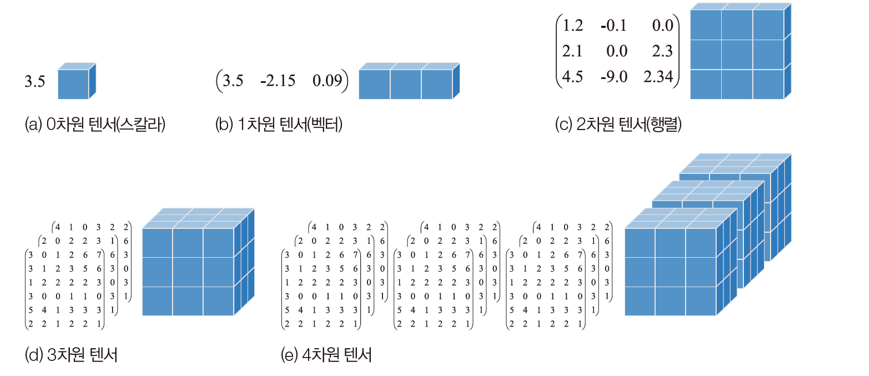

In [4]:
# 0 ~ 4차원 구조의 텐서
# 1차원 : iris 샘플 하나
# 2차원 : iris 샘플 여러개, 명암 영상 한장
# 3차원 : 명암 영상 여러장, 컬러 영상 한장
# 4차원 : 컬러영상 여러개, 컬러 동영상 하나
# 5차원 : 컬러 동영상 여러개
Image("https://raw.githubusercontent.com/bigdataleeky/python/main/image/33.PNG", width=500)

In [5]:
import tensorflow as tf
import tensorflow.keras.datasets as ds

In [6]:
# 텐서플로우가 제공하는 데이터 셋 알아보기
# MNIST, cifar10, Boston housing, Reuters

In [7]:
# Mnist
(x_train,y_train),(x_target,y_target) = ds.mnist.load_data()
yy_train =  tf.one_hot(y_train,10,dtype=tf.int8)
print("MNIST:",x_train.shape, y_train.shape, yy_train.shape)

MNIST: (60000, 28, 28) (60000,) (60000, 10)


In [8]:
# Mnist
# (x_train,y_train),(x_target,y_target) = ds.cifar10.load_data()
(x_train, y_train),(x_target, y_target) = ds.cifar10.load_data()

yy_train =  tf.one_hot(y_train,10,dtype=tf.int8)
print("MNIST:",x_train.shape, y_train.shape, yy_train.shape)

MNIST: (50000, 32, 32, 3) (50000, 1) (50000, 1, 10)


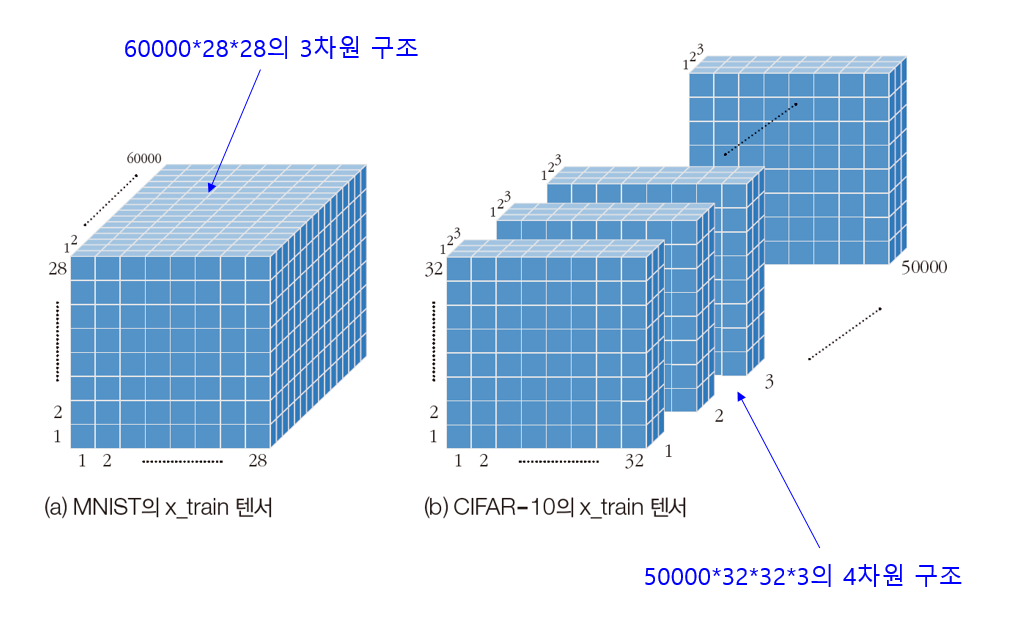

In [9]:
Image("https://raw.githubusercontent.com/bigdataleeky/python/main/image/34.PNG", width=500)

In [10]:
# 사이킷런 라이브러리로는 딥러닝 구현이 어려워서 텐서플로(파이토치)로 갈아탐...

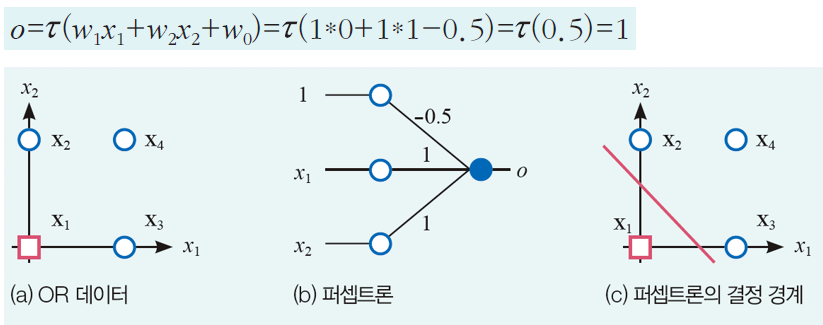

In [11]:
from IPython.display import Image
Image("https://raw.githubusercontent.com/bigdataleeky/python/main/image/01.PNG", width=500)

In [12]:
import tensorflow as tf
# 퍼셉트론의 동작을 구현
#  OR 데이터 구축
x = [[0.0,0.0],[0.0,1.0],[1.0,0.0],[1.0,1.0]]
y = [[-1],[1],[1],[1]]

# (b)퍼셉트론
w = tf.Variable([[1.0],[1.0]])
b = tf.Variable(-0.5)

s = tf.add(tf.matmul(x,w),b)
o = tf.sign(s)

o


<tf.Tensor: shape=(4, 1), dtype=float32, numpy=
array([[-1.],
       [ 1.],
       [ 1.],
       [ 1.]], dtype=float32)>

In [13]:
# 프로그램 1
# 퍼셉트론 학습
#  OR 데이터 구축
x = [[0.0,0.0],[0.0,1.0],[1.0,0.0],[1.0,1.0]]
y = [[-1],[1],[1],[1]]

# 가중치 초기화
w = tf.Variable(tf.random.uniform([2,1],-0.5,0.5))
b = tf.Variable(tf.zeros([1]))

#옵티마이저
opt = tf.keras.optimizers.Adam(learning_rate=0.1)

# 전방 계산식
def forward():
    s= tf.add(tf.matmul(x,w),b)
    o =tf.tanh(s)
    return o

# 손실함수
def loss():
    o = forward()
    return tf.reduce_mean((y-o)**2)

# 500세대까지 학습(100세대마다 학습 정보 출력)
for i in range(500):
    opt.minimize(loss,var_list=[w,b])
    if(i%100 == 0):
        print(f"loss at epoch{i} = {loss().numpy()}")

# 학습된 페셉트론으로 OR 데이터를 예측
o = forward()
print(o)

loss at epoch0 = 0.6406105756759644
loss at epoch100 = 0.008142282254993916
loss at epoch200 = 0.0032265831250697374
loss at epoch300 = 0.0018005522433668375
loss at epoch400 = 0.0011724702781066298
tf.Tensor(
[[-0.95612806]
 [ 0.97130233]
 [ 0.97555274]
 [ 0.99999195]], shape=(4, 1), dtype=float32)


In [14]:
# 프로그램 1 에서 사용한 명령어들의 예시

In [15]:
x = tf.constant([[1.,3.],[2.,6.]])
print(x)
print(tf.reduce_mean(x))
print(tf.reduce_mean(x,0))  # 열단위
print(tf.reduce_mean(x,1)) # 행단위

tf.Tensor(
[[1. 3.]
 [2. 6.]], shape=(2, 2), dtype=float32)
tf.Tensor(3.0, shape=(), dtype=float32)
tf.Tensor([1.5 4.5], shape=(2,), dtype=float32)
tf.Tensor([2. 4.], shape=(2,), dtype=float32)


In [16]:
# -0.5 ~ 0.5 사이의 중복되지 않은 임의의 데이터를 2,1 shape 형태로 랜덤하게 출력
tf.random.uniform([2,1],-0.5,0.5)

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[-0.45374227],
       [-0.3972299 ]], dtype=float32)>

In [17]:
tf.zeros([1])

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.], dtype=float32)>

In [18]:
# 프로그램1의 문제점
# 날코딩..... 손코딩...
# 케라스가 이런 수고를 덜어줌
# 프로그램의 추상화
# 케라스는 이 추상화를 활용한 라이브러를 제공 
# 코딩방식이 model.add(Dense(.. ...))
# 케라스 keras.io 공식 사이트의 케라스 철학
# 아이디어를 빠르게 결과로 연결하는 능력이 훌륭한 연구의 핵심 - 사람을위해 설계된 API

In [19]:
# keras의 중요 하위 클래스
# model 클래스 : 함수형태의 api 모델 제작 방식
# layer 클래스 : 다양한 종류의 층
# optimizers 클래스 : 최적화에 필요한 함수

In [20]:
# 프로그램 2
# 퍼셉트론 학습
from tensorflow.keras.models import Sequential  # 층을 한줄로 쌓는데 사용
from tensorflow.keras.layers import Dense       # 완전 연결층
from tensorflow.keras.optimizers import SGD     # 기본 옵티마이져

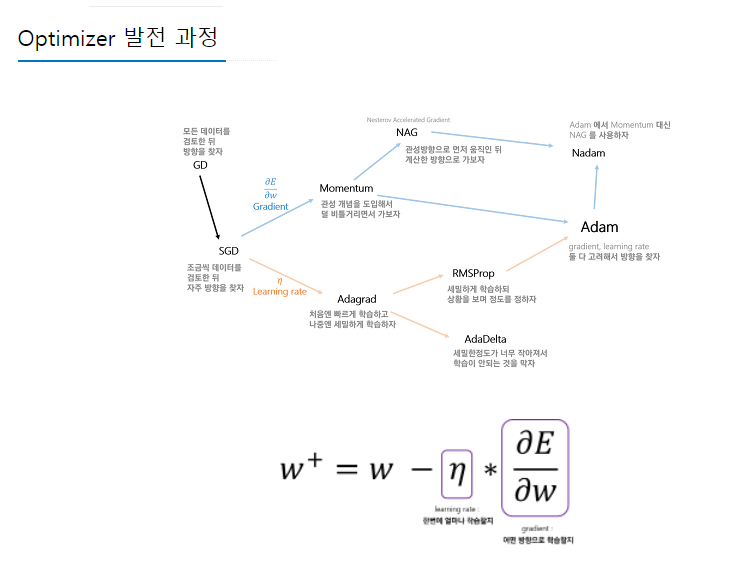

In [21]:
# 옵티마이져의 종류
Image("https://raw.githubusercontent.com/bigdataleeky/python/main/image/35.PNG", width=600)

In [22]:
# 케라스프로그래밍 절차
# 데이터구축 -> 신경망 구조 설계 -> 학습 -> 예측
# OR 데이터 구축
x = [[0.0,0.0],[0.0,1.0],[1.0,0.0],[1.0,1.0]]
y = [[-1],[1],[1],[1]]

# 신경망 구조 설계
n_input = 2
n_output = 1

perceptron = Sequential() # 객체생성
perceptron.add(Dense(units=n_output,activation='tanh',input_shape=(n_input,),
                     kernel_initializer='random_uniform', bias_initializer='zeros'))

# 신경망 학습
perceptron.compile(loss='mse', optimizer=SGD(learning_rate=0.1), metrics=['mse'])
perceptron.fit(x,y,epochs=500,verbose=2)

# 학습된 신경망을 예측
res = perceptron.predict(x)
print(res)

Epoch 1/500
1/1 - 0s - loss: 0.9706 - mse: 0.9706 - 257ms/epoch - 257ms/step
Epoch 2/500
1/1 - 0s - loss: 0.7341 - mse: 0.7341 - 3ms/epoch - 3ms/step
Epoch 3/500
1/1 - 0s - loss: 0.6309 - mse: 0.6309 - 3ms/epoch - 3ms/step
Epoch 4/500
1/1 - 0s - loss: 0.5796 - mse: 0.5796 - 3ms/epoch - 3ms/step
Epoch 5/500
1/1 - 0s - loss: 0.5482 - mse: 0.5482 - 3ms/epoch - 3ms/step
Epoch 6/500
1/1 - 0s - loss: 0.5255 - mse: 0.5255 - 3ms/epoch - 3ms/step
Epoch 7/500
1/1 - 0s - loss: 0.5071 - mse: 0.5071 - 2ms/epoch - 2ms/step
Epoch 8/500
1/1 - 0s - loss: 0.4910 - mse: 0.4910 - 3ms/epoch - 3ms/step
Epoch 9/500
1/1 - 0s - loss: 0.4765 - mse: 0.4765 - 3ms/epoch - 3ms/step
Epoch 10/500
1/1 - 0s - loss: 0.4628 - mse: 0.4628 - 3ms/epoch - 3ms/step
Epoch 11/500
1/1 - 0s - loss: 0.4499 - mse: 0.4499 - 2ms/epoch - 2ms/step
Epoch 12/500
1/1 - 0s - loss: 0.4376 - mse: 0.4376 - 3ms/epoch - 3ms/step
Epoch 13/500
1/1 - 0s - loss: 0.4257 - mse: 0.4257 - 2ms/epoch - 2ms/step
Epoch 14/500
1/1 - 0s - loss: 0.4143 - mse:

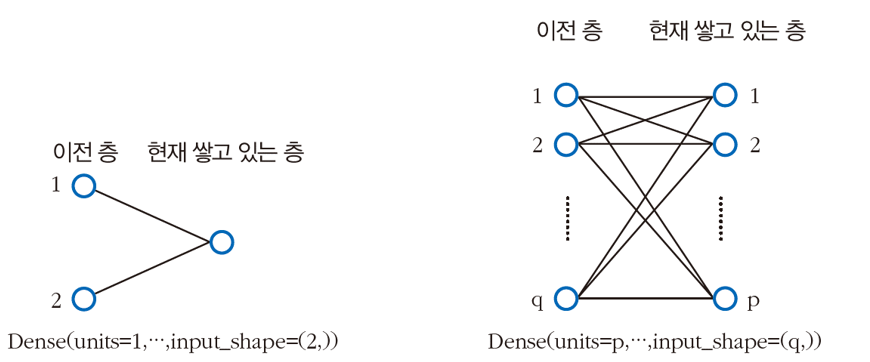

In [23]:
# Dense로 완전연결층을 쌓는 방식
Image("https://raw.githubusercontent.com/bigdataleeky/python/main/image/36.PNG", width=600)

In [24]:
# MNIST vs fashion MNIST 데이터를 다층 퍼셉트론으로 인식하는 실습

In [25]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [26]:
# mnist에서 데이터를 읽어와서 신경망에 입력할 형태로 변환
(x_train,y_train),(x_target,y_target) = mnist.load_data()
x_train.shape,x_target.shape

((60000, 28, 28), (10000, 28, 28))

In [27]:
# 딥러닝의 신경망에 적용하려면 2차원 또는 그 이하...
# reshape 함수로 2차원 구조의 텐서를 1차원 구조로 변환
x_train = x_train.reshape(-1,28*28)
x_target = x_target.reshape(-1,28*28)
x_train.shape, x_target.shape

((60000, 784), (10000, 784))

In [28]:
# 정규화... 
np.array(range(10))/ 10.0

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [29]:
np.unique(x_train[0])/255.0

array([0.        , 0.00392157, 0.00784314, 0.01176471, 0.03529412,
       0.04313725, 0.05490196, 0.0627451 , 0.07058824, 0.09019608,
       0.09411765, 0.09803922, 0.10196078, 0.10588235, 0.11764706,
       0.1372549 , 0.14117647, 0.15294118, 0.16862745, 0.17647059,
       0.18039216, 0.19215686, 0.21568627, 0.21960784, 0.25098039,
       0.25882353, 0.2745098 , 0.30588235, 0.31372549, 0.31764706,
       0.32156863, 0.35294118, 0.36470588, 0.36862745, 0.41960784,
       0.42352941, 0.44705882, 0.46666667, 0.49411765, 0.49803922,
       0.50980392, 0.51764706, 0.52156863, 0.52941176, 0.53333333,
       0.54509804, 0.58039216, 0.58823529, 0.60392157, 0.61176471,
       0.62745098, 0.65098039, 0.66666667, 0.67058824, 0.6745098 ,
       0.68627451, 0.71372549, 0.71764706, 0.72941176, 0.73333333,
       0.74509804, 0.76470588, 0.77647059, 0.78823529, 0.80392157,
       0.81176471, 0.83137255, 0.83529412, 0.85882353, 0.86666667,
       0.88235294, 0.88627451, 0.89803922, 0.93333333, 0.94117

In [30]:
# 정규화 : 데이터의 범위를 알고있으면 수동으로 정규화 해도 됨
(x_train/255.0)[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [31]:
x_train = x_train / 255.0
x_target = x_target / 255.0

In [32]:
# 정답데이터 0 /1  이진 아니고 다중일때.
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [33]:
# 레이블 원핫으로 인코딩
np.unique( y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [34]:
y_train =  tf.keras.utils.to_categorical(y_train,10)
y_target =  tf.keras.utils.to_categorical(y_target,10)
y_train.shape

(60000, 10)

In [35]:
# 다층 퍼셉트론 == 심층신경망
# 입력,히든, 출력
# 신경망 구조를 설계
n_input    = 28*28
n_hidden   = 1024
n_output = 10
mlp = Sequential()
mlp.add(Dense(units=n_hidden,activation='tanh',input_shape=(n_input,),
              kernel_initializer='random_uniform',bias_initializer='zeros'))
mlp.add(Dense(units=n_output,activation='tanh',
              kernel_initializer='random_uniform',bias_initializer='zeros'))

In [36]:
# 신경망 학습
mlp.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.001),metrics=['accuracy'])
# 학습결과를 저장하는 이유는 시각화에 이용하려고
hist = mlp.fit(x_train,y_train,batch_size=128,epochs=30,validation_data=(x_target,y_target),verbose=2)

Epoch 1/30
469/469 - 3s - loss: 0.0435 - accuracy: 0.8439 - val_loss: 0.0306 - val_accuracy: 0.9134 - 3s/epoch - 7ms/step
Epoch 2/30
469/469 - 3s - loss: 0.0225 - accuracy: 0.9291 - val_loss: 0.0185 - val_accuracy: 0.9428 - 3s/epoch - 6ms/step
Epoch 3/30
469/469 - 3s - loss: 0.0166 - accuracy: 0.9479 - val_loss: 0.0144 - val_accuracy: 0.9533 - 3s/epoch - 6ms/step
Epoch 4/30
469/469 - 3s - loss: 0.0138 - accuracy: 0.9570 - val_loss: 0.0130 - val_accuracy: 0.9573 - 3s/epoch - 6ms/step
Epoch 5/30
469/469 - 3s - loss: 0.0122 - accuracy: 0.9633 - val_loss: 0.0123 - val_accuracy: 0.9621 - 3s/epoch - 6ms/step
Epoch 6/30
469/469 - 3s - loss: 0.0111 - accuracy: 0.9676 - val_loss: 0.0110 - val_accuracy: 0.9639 - 3s/epoch - 6ms/step
Epoch 7/30
469/469 - 3s - loss: 0.0102 - accuracy: 0.9711 - val_loss: 0.0105 - val_accuracy: 0.9649 - 3s/epoch - 6ms/step
Epoch 8/30
469/469 - 3s - loss: 0.0096 - accuracy: 0.9735 - val_loss: 0.0102 - val_accuracy: 0.9654 - 3s/epoch - 6ms/step
Epoch 9/30
469/469 - 3s 

In [37]:
# 신경망 예측
res = mlp.evaluate(x_target,y_target,verbose=1)

313/313 [==============================] - 1s 2ms/step - loss: 0.0077 - accuracy: 0.9749


In [38]:
print(f"정확률 : {round(res[1]*100,3)}")

정확률 : 97.49


In [39]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

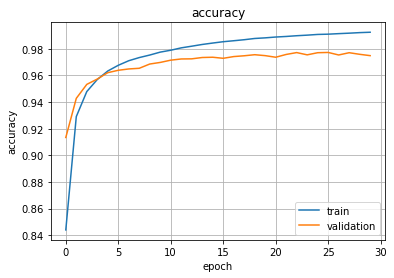

In [40]:
import matplotlib.pyplot as plt
# hist 객체를 이용해서 학습곡선
# 다층 퍼셉트론, 심층 신경망의 시각화
# 정확률 곡선
# 손실 함수 곡선


# 정확률 곡선
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title("accuracy")
plt.ylabel('accuracy')
plt.xlabel("epoch")
plt.legend(['train','validation'],loc = 'best')
plt.grid()
plt.show()


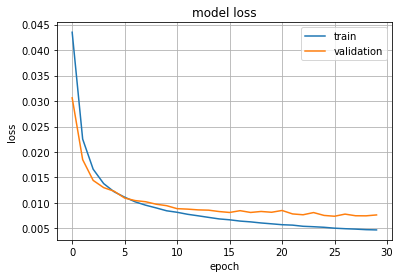

In [41]:
# 손실 함수 곡선
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model loss")
plt.ylabel('loss')
plt.xlabel("epoch")
plt.legend(['train','validation'],loc = 'best')
plt.grid()
plt.show()

In [42]:
# 위의 두개의 그래프를한개의 row에 표시

In [43]:
#다층 퍼셉트론으로 fashionMNIST 인식
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

In [44]:
# 신경망 구성 라이브러리
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [45]:
# 데이터 구성
(x_train,y_train),(x_target,y_target) = fashion_mnist.load_data()

In [46]:
x_train.shape,   x_target.shape

((60000, 28, 28), (10000, 28, 28))

In [47]:
# 텐서의 모양 변경... reshape
x_train = x_train.reshape(-1,28*28); x_target = x_target.reshape(-1,28*28)

In [48]:
# 스케일링
x_train = x_train / 255.0; x_target = x_target / 255.0

In [49]:
# 정답데이터를 ont hot encording
y_train = tf.keras.utils.to_categorical(y_train,10)
y_target = tf.keras.utils.to_categorical(y_target,10)

In [50]:
n_input = 28*28
n_hidden = 1024
n_output = 10
mlp = Sequential()
mlp.add(Dense(units=n_hidden, activation='ReLU', input_shape=(n_input,),
             kernel_initializer='random_uniform', bias_initializer='zeros') )
mlp.add(Dense(units=n_output, activation='softmax', 
             kernel_initializer='random_uniform', bias_initializer='zeros') )

In [51]:
mlp.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.001),
           metrics=['accuracy'])
hist = mlp.fit(x_train, y_train,batch_size=128,epochs=30,validation_data=(x_target,y_target)
               ,verbose=2)

Epoch 1/30
469/469 - 3s - loss: 0.0255 - accuracy: 0.8237 - val_loss: 0.0219 - val_accuracy: 0.8502 - 3s/epoch - 6ms/step
Epoch 2/30
469/469 - 3s - loss: 0.0197 - accuracy: 0.8656 - val_loss: 0.0201 - val_accuracy: 0.8597 - 3s/epoch - 6ms/step
Epoch 3/30
469/469 - 3s - loss: 0.0178 - accuracy: 0.8788 - val_loss: 0.0200 - val_accuracy: 0.8593 - 3s/epoch - 6ms/step
Epoch 4/30
469/469 - 3s - loss: 0.0166 - accuracy: 0.8868 - val_loss: 0.0199 - val_accuracy: 0.8636 - 3s/epoch - 6ms/step
Epoch 5/30
469/469 - 3s - loss: 0.0157 - accuracy: 0.8920 - val_loss: 0.0183 - val_accuracy: 0.8740 - 3s/epoch - 6ms/step
Epoch 6/30
469/469 - 3s - loss: 0.0151 - accuracy: 0.8970 - val_loss: 0.0177 - val_accuracy: 0.8790 - 3s/epoch - 6ms/step
Epoch 7/30
469/469 - 3s - loss: 0.0143 - accuracy: 0.9041 - val_loss: 0.0178 - val_accuracy: 0.8781 - 3s/epoch - 6ms/step
Epoch 8/30
469/469 - 3s - loss: 0.0140 - accuracy: 0.9058 - val_loss: 0.0176 - val_accuracy: 0.8818 - 3s/epoch - 6ms/step
Epoch 9/30
469/469 - 3s 

In [52]:
# 정확율
res =  mlp.evaluate(x_target,y_target)
res

313/313 [==============================] - 1s 2ms/step - loss: 0.0155 - accuracy: 0.8974


[0.01550736092031002, 0.8974000215530396]

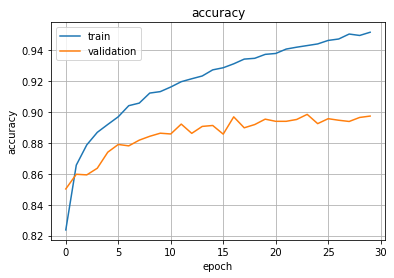

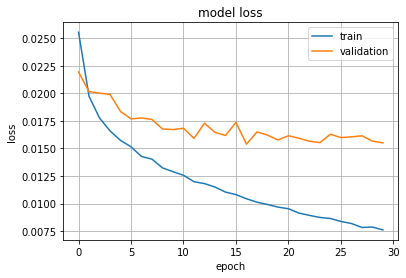

In [53]:
# 정확률 곡선
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title("accuracy")
plt.ylabel('accuracy')
plt.xlabel("epoch")
plt.legend(['train','validation'],loc = 'best')
plt.grid()
plt.show()

# 손실 함수 곡선
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model loss")
plt.ylabel('loss')
plt.xlabel("epoch")
plt.legend(['train','validation'],loc = 'best')
plt.grid()
plt.show()

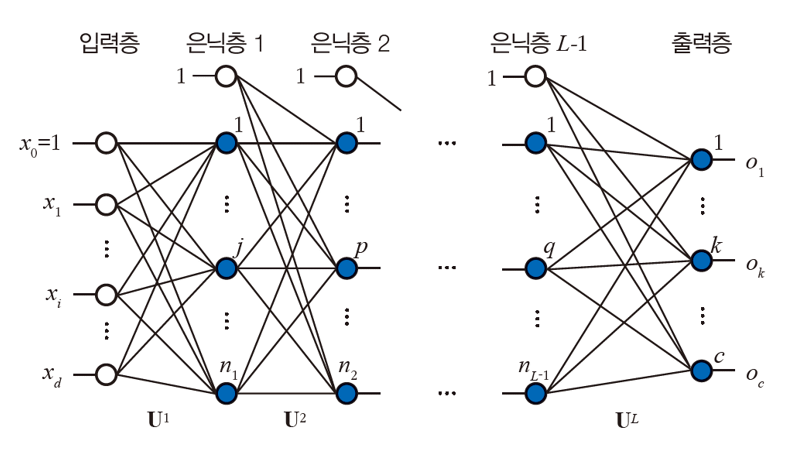

In [54]:
from IPython.display import Image
Image("https://raw.githubusercontent.com/bigdataleeky/python/main/image/37.PNG", width=500)

In [55]:
# L-1 개의 은닉층이 있는 L층 신경망,입력층 d+1개의 노드, 출력층 c개의 노드
# i번째 은닉층에 ni개의 노드(ni는 하이퍼매개변수)
# 인접한 층은 완전연결 FC(fully-connected) -- 가중치가 많은 구조
# ni= 500   L = 5이면
# MNIST 데이터에서 (784+1)*500 + (500+1)*500*3 + (500+1)*10 = 어마어마한 가중치

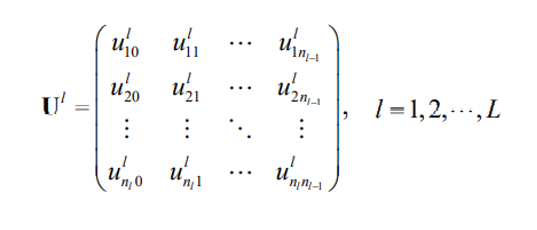

In [56]:
Image("https://raw.githubusercontent.com/bigdataleeky/python/main/image/38.PNG", width=500)

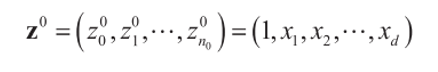

In [57]:
Image("https://raw.githubusercontent.com/bigdataleeky/python/main/image/39.PNG", width=500)

In [58]:
# 1,2,3 .. L-1층의 활성화 함수는 ReLU, L층(출력층)은 softmax를 주로 사용

In [59]:
# 다층퍼셉트론은 오류 역전파 알고리즘을 사용

In [61]:
# 깊은 다층 퍼셉트론
# 데이터 구성
(x_train,y_train),(x_target,y_target) = fashion_mnist.load_data()
# 텐서의 모양 변경... reshape
x_train = x_train.reshape(-1,28*28); x_target = x_target.reshape(-1,28*28)
x_train = x_train / 255.0; x_target = x_target / 255.0
# 정답데이터를 ont hot encording
y_train = tf.keras.utils.to_categorical(y_train,10)
y_target = tf.keras.utils.to_categorical(y_target,10)
n_input = 28*28
n_hidden = 1024
n_hidden2 = 512
n_hidden3 = 512
n_hidden4 = 512
n_output = 10
mlp = Sequential()  # 입력층의 역활....(의미상)
# hidden layer 1
mlp.add(Dense(units=n_hidden, activation='ReLU', input_shape=(n_input,)))
# hidden layer 2
mlp.add(Dense(units=n_hidden2, activation='ReLU') )
# hidden layer 3
mlp.add(Dense(units=n_hidden3, activation='ReLU') )
# hidden layer 4
mlp.add(Dense(units=n_hidden4, activation='ReLU') )

#출력층
mlp.add(Dense(units=n_output, activation='softmax'))
mlp.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
hist = mlp.fit(x_train, y_train,batch_size=128,epochs=30,validation_data=(x_target,y_target) ,verbose=2)
# 정확율
res =  mlp.evaluate(x_target,y_target)
res


Epoch 1/30
469/469 - 9s - loss: 0.0268 - accuracy: 0.8116 - val_loss: 0.0237 - val_accuracy: 0.8364 - 9s/epoch - 18ms/step
Epoch 2/30
469/469 - 8s - loss: 0.0198 - accuracy: 0.8619 - val_loss: 0.0198 - val_accuracy: 0.8638 - 8s/epoch - 16ms/step
Epoch 3/30
469/469 - 8s - loss: 0.0180 - accuracy: 0.8757 - val_loss: 0.0189 - val_accuracy: 0.8701 - 8s/epoch - 17ms/step
Epoch 4/30
469/469 - 8s - loss: 0.0169 - accuracy: 0.8838 - val_loss: 0.0187 - val_accuracy: 0.8702 - 8s/epoch - 17ms/step
Epoch 5/30
469/469 - 8s - loss: 0.0162 - accuracy: 0.8886 - val_loss: 0.0190 - val_accuracy: 0.8701 - 8s/epoch - 18ms/step
Epoch 6/30
469/469 - 8s - loss: 0.0153 - accuracy: 0.8960 - val_loss: 0.0183 - val_accuracy: 0.8756 - 8s/epoch - 17ms/step
Epoch 7/30
469/469 - 8s - loss: 0.0146 - accuracy: 0.9003 - val_loss: 0.0186 - val_accuracy: 0.8713 - 8s/epoch - 16ms/step
Epoch 8/30
469/469 - 8s - loss: 0.0142 - accuracy: 0.9029 - val_loss: 0.0173 - val_accuracy: 0.8813 - 8s/epoch - 17ms/step
Epoch 9/30
469/4

[0.016820944845676422, 0.8935999870300293]

In [62]:
# 정확율
res =  mlp.evaluate(x_target,y_target)
res

313/313 [==============================] - 1s 4ms/step - loss: 0.0168 - accuracy: 0.8936


[0.016820944845676422, 0.8935999870300293]

In [63]:
# kernel_initializer 의 기본값은 Glorot2010에서 "glorot_uniform"  텐서플로에서 가장좋은 성능을 보여 기본값으로
# 채택되었기 때문에 앞으로 생략한다.

In [64]:
# 딥러닝에서.. 지금처럼 깊은 다층 퍼셉트론은 사용하면 문제점
# 1. 그레디언트 소멸문제
# 2. 과잉적합 문제(과적합)

In [65]:
# 미분의 연쇄법칙(chain rule)에 의하면
# i번째 층의 그레디언트는 오른쪽에 있는 i+1번째 층의 그레디언트에 자신 층에서 발생한 그레디언트를 곱해서 구함
# 그레디언트 0.001처럼 매우작으면 왼쪽으로 진행하면서 점점 작아짐
# 왼쪽으로 갈수록 가중치 갱신이 느려져서 전체 신경망의 학습이 매우느린 현상이 발생
# 해결 --> 병열처리 프로세스로 변경 -GUP사용하거나 또는 
# colab 에서  런타임->런타임 유형 변경 -> 하드웨어 가속기 TPU로 설정

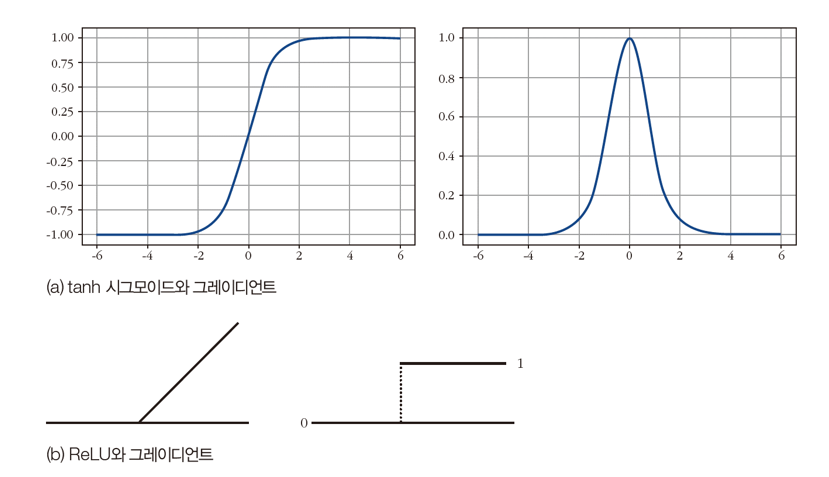

In [66]:
# 프로그램적으로는
# ReLU 함수를 사용하여 해결
  # Tanh(s)  : 시그모이드 함수의 문제점
    # s 가 클때 그레디언트가 0에 가까워짐(s=8이면 그레디언트값은 0.0000004501)
#ReLU 는 s가 음수일때 그레디언트0 양수일때는 1
Image("https://raw.githubusercontent.com/bigdataleeky/python/main/image/40.PNG", width=500)

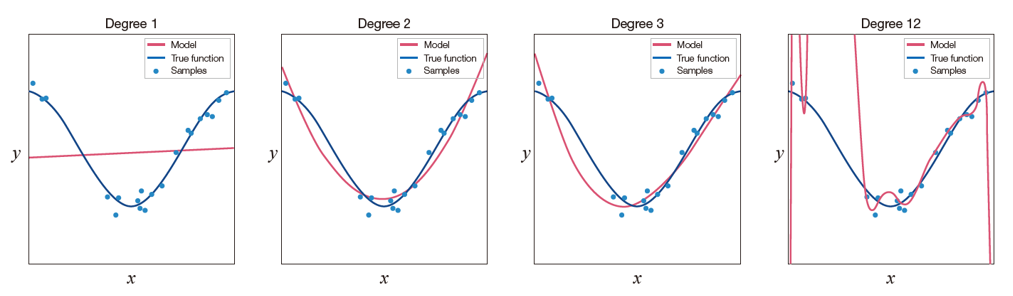

In [67]:
# 과적합 회피(과소적합, 과잉적합)
# x:특성, y:레이블  --> 회귀문제로 설명
# 모델..1차 다항식을 사용->과소적합(데이터에 비해 모델 용량(차수)(컬럼수)(피처)이 작은 상황)
# 용량이 가장큰 12차 다항식은 훈련 집합에 대해 가장 적은 오류
Image("https://raw.githubusercontent.com/bigdataleeky/python/main/image/41.PNG", width=800)

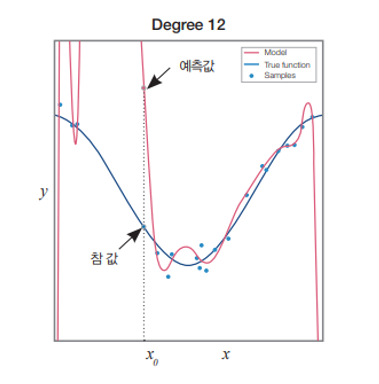

In [68]:
#과잉적합 에따른 부정확한 예측
Image("https://raw.githubusercontent.com/bigdataleeky/python/main/image/42.PNG", width=300)

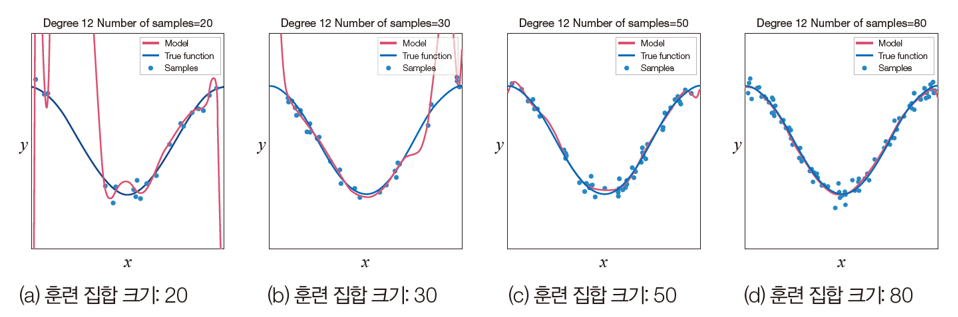

In [69]:
Image("https://raw.githubusercontent.com/bigdataleeky/python/main/image/43.PNG", width=500)
#데이터 양을 늘림,데이터양을 늘릴 수 없는 상황에서는 훈련 셈플을 변형하여 인위적으로 늘리는 
#데이터 증대(data augmentation)


In [70]:
# 규제 기법
# 데이터 증대, 가중치 감소, 드롭아웃, 앙상블 등.....

In [71]:
# 분류 classsifcation --> 레이블이 이산
# 레이블이 연속인 경우를 구별해.. 회귀regression 문제라고 부른다.
# 회귀문제를 푸는 일반화 선형모델-> 분류문제를풀수 있는 로지스틱 회귀
# 분류 <->회귀

In [72]:
# 평균제곱오차 문제점
# 교정에 사용하는 값... 그레디언트가 벌점에 해당. 오차가 더큰데 그레디언트가 더 작은 상황이 발생
# 학습이 느려지거나 안되는 상황을 초래
#-> 해결하기 위해서 엔트로피를 사용: 학률 분포의 무작위성을 측정하는 함수 식
# 완전한 주사위 vs 찌그러진 주사위(특정 면적... 1의 면적인 더 넓어)
# 찌그러진 주사위(특정 면적... 1의 면적인 더 넣어.) 애는 1이 될확률이 더 높다.. 즉.. 불확실성이 낮아짐
# 정육면체의 엔트로피  모든 값들이 나올 확율은 1/6
# 1/6log+ 1/6log ....   1.7918
# 찌그러진주사위(1이 1/2 , 나머지는 1/10)
# 찌그러진 주사위 공정한주사위 교차 엔트로피 = 2.xxx
# 교차엔트로피 손실함수 : 평균제곱오차의 불공성 문제를 해결 -- 손실 함수

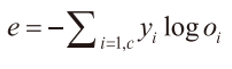

In [75]:
# 교차엔트로피 = 평균제곱오차의 불공정성 문제를 해결해 줌
# 딥러닝은 주로 교차 엔트로피를 사용
Image("https://raw.githubusercontent.com/bigdataleeky/python/main/image/44.PNG", width=200)

In [76]:
# 숫자인식..... 부류 3에 속하는 셈프리.. y=(0,0,0,1,0...0)  신경망의 출력 o = (0.1, 0, 0, 0.9, 0,0..)
# e = -(0*log(0.1) + 0*log(0) + 0*log(0) + 1*log(0.9.....) = 0.1054

# 신경망이 o = (0, 0.9, 0, 0.1, ... ) 
# e = 2.3026   

# 틀린경우가 손실함수의 값이 훨씬 크다는 것을 알수 있음

In [77]:
# 손실함수 도큐먼트 사이트 https://keras.io/api/losses/

In [79]:
# mlp.compile(loss='categorical_crossentrotpy,.....
import tensorflow as tf
# mlp.compile(loss = tf.keras.losses.categorical_crossentropy...

import tensorflow.keras.losses as ls
# mlp.compile(loss=ls.categorical_crossentropy

In [86]:
#  손실함수의 성능을 비교 : 평균제곱오차 VS 교차 엔트로피
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import tensorflow.keras.losses as ls

In [81]:
# 데이터 로드
(x_train,y_train),(x_target,y_target) = mnist.load_data()
# 신경망은 1차원텐서
x_train = x_train.reshape(-1, 28*28)
x_target = x_target.reshape(-1, 28*28)
# 데이터 표준화
x_train =  x_train / 255.0
x_target = x_target / 255.0
# 레이블 인코딩
y_train = tf.keras.utils.to_categorical(y_train,10)
y_target = tf.keras.utils.to_categorical(y_target,10)

In [83]:
# 신경망 디자인  hidden layer 4개인 신경망 설계
n_input = 28*28
n_hidden1 = 1024; n_hidden2 = n_hidden3 =n_hidden4 = 512
n_output = 10

In [85]:
mse_mlp = Sequential()
mse_mlp.add(Dense(units=n_hidden1,activation='ReLU', input_shape = (n_input,) ))
mse_mlp.add(Dense(units=n_hidden2,activation='ReLU'))
mse_mlp.add(Dense(units=n_hidden3,activation='ReLU'))
mse_mlp.add(Dense(units=n_hidden4,activation='ReLU'))
mse_mlp.add(Dense(units=n_output,activation='softmax'))

In [87]:
mse_mlp.compile(loss=ls.mean_squared_error, optimizer = Adam(learning_rate=0.001), metrics=['accuracy'])
hist = mse_mlp.fit(x_train,y_train,batch_size=128,epochs=30,validation_data=(x_target,y_target),verbose=2)

Epoch 1/30
469/469 - 7s - loss: 0.0108 - accuracy: 0.9269 - val_loss: 0.0057 - val_accuracy: 0.9623 - 7s/epoch - 16ms/step
Epoch 2/30
469/469 - 8s - loss: 0.0055 - accuracy: 0.9649 - val_loss: 0.0056 - val_accuracy: 0.9631 - 8s/epoch - 16ms/step
Epoch 3/30
469/469 - 7s - loss: 0.0041 - accuracy: 0.9740 - val_loss: 0.0052 - val_accuracy: 0.9672 - 7s/epoch - 15ms/step
Epoch 4/30
469/469 - 7s - loss: 0.0035 - accuracy: 0.9775 - val_loss: 0.0041 - val_accuracy: 0.9744 - 7s/epoch - 15ms/step
Epoch 5/30
469/469 - 7s - loss: 0.0031 - accuracy: 0.9804 - val_loss: 0.0040 - val_accuracy: 0.9750 - 7s/epoch - 15ms/step
Epoch 6/30
469/469 - 7s - loss: 0.0026 - accuracy: 0.9837 - val_loss: 0.0043 - val_accuracy: 0.9732 - 7s/epoch - 16ms/step
Epoch 7/30
469/469 - 7s - loss: 0.0024 - accuracy: 0.9854 - val_loss: 0.0041 - val_accuracy: 0.9753 - 7s/epoch - 15ms/step
Epoch 8/30
469/469 - 8s - loss: 0.0022 - accuracy: 0.9867 - val_loss: 0.0035 - val_accuracy: 0.9788 - 8s/epoch - 16ms/step
Epoch 9/30
469/4

In [88]:
# 교차 엔트로피
mse_crose = Sequential()
mse_crose.add(Dense(units=n_hidden1,activation='ReLU', input_shape = (n_input,) ))
mse_crose.add(Dense(units=n_hidden2,activation='ReLU'))
mse_crose.add(Dense(units=n_hidden3,activation='ReLU'))
mse_crose.add(Dense(units=n_hidden4,activation='ReLU'))
mse_crose.add(Dense(units=n_output,activation='softmax'))
mse_crose.compile(loss=ls.categorical_crossentropy, optimizer = Adam(learning_rate=0.001), metrics=['accuracy'])
hist_corse = mse_crose.fit(x_train,y_train,batch_size=128,epochs=30,validation_data=(x_target,y_target),verbose=2)

Epoch 1/30
469/469 - 8s - loss: 0.2127 - accuracy: 0.9340 - val_loss: 0.1235 - val_accuracy: 0.9616 - 8s/epoch - 17ms/step
Epoch 2/30
469/469 - 8s - loss: 0.0863 - accuracy: 0.9739 - val_loss: 0.0799 - val_accuracy: 0.9756 - 8s/epoch - 17ms/step
Epoch 3/30
469/469 - 8s - loss: 0.0606 - accuracy: 0.9812 - val_loss: 0.0895 - val_accuracy: 0.9737 - 8s/epoch - 16ms/step
Epoch 4/30
469/469 - 7s - loss: 0.0456 - accuracy: 0.9865 - val_loss: 0.0912 - val_accuracy: 0.9757 - 7s/epoch - 16ms/step
Epoch 5/30
469/469 - 7s - loss: 0.0363 - accuracy: 0.9888 - val_loss: 0.0898 - val_accuracy: 0.9778 - 7s/epoch - 16ms/step
Epoch 6/30
469/469 - 7s - loss: 0.0324 - accuracy: 0.9903 - val_loss: 0.0894 - val_accuracy: 0.9741 - 7s/epoch - 16ms/step
Epoch 7/30
469/469 - 8s - loss: 0.0266 - accuracy: 0.9922 - val_loss: 0.1025 - val_accuracy: 0.9764 - 8s/epoch - 17ms/step
Epoch 8/30
469/469 - 7s - loss: 0.0258 - accuracy: 0.9918 - val_loss: 0.0748 - val_accuracy: 0.9803 - 7s/epoch - 15ms/step
Epoch 9/30
469/4

In [90]:
# 두 모델의 정확률 비교
accuracy_mlp = mse_mlp.evaluate(x_target,y_target)
accuracy_corse = mse_crose.evaluate(x_target,y_target)
print(f"평균제곱오차 정확률 { round(accuracy_mlp[1]*100, 3) }")
print(f"교차 엔트로피 정확률 { round(accuracy_corse[1]*100, 3) }")                    

313/313 [==============================] - 1s 4ms/step - loss: 0.1146 - accuracy: 0.9826
평균제곱오차 정확률 98.01
교차 엔트로피 정확률 98.26


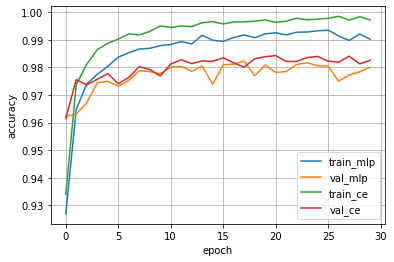

In [91]:
# 한개의 그래프로 두 모델을 비교
import matplotlib.pyplot as plt
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.plot(hist_corse.history['accuracy'])
plt.plot(hist_corse.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_mlp','val_mlp','train_ce','val_ce'])
plt.grid()
plt.show()

In [92]:
# 손실함수의 최저점 옵티마이저의 표준은 SGD  개선하는 두가지 아이디어
# 모멘텀 momentum
# 적응적 학습률 adaptive learning rate

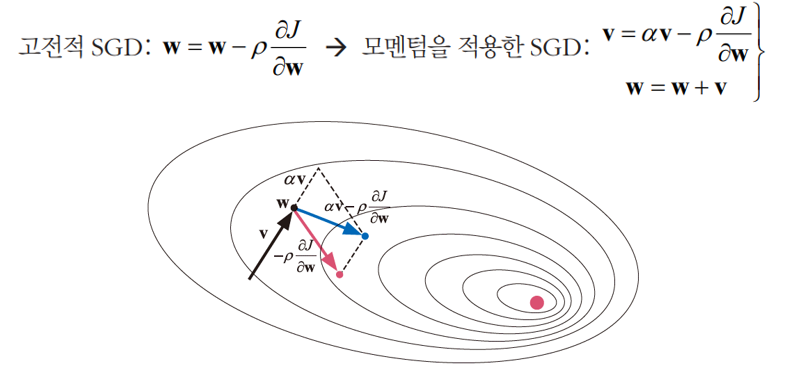

In [94]:

# 물리에서 모멘텀
# 이전의 운동량을 현재에반영(관성)
# 옵티마이저에 적용하면 성능향상이 뚜렷함
Image("https://raw.githubusercontent.com/bigdataleeky/python/main/image/45.PNG", width=500)
# 원리
# 이전 방향정보 V를 같이 고려( 알파는 [0,1] 사이에서조절)
# 알파 = 0이면 고전적 SGD, 알파가 1에 가까울수록 이전 정보에 큰 가중치를 적용
# 기본은 알파=0.5, 0.9

In [95]:
# 네스테로프 모멘텀
# 핸재 점 W  에서 미분하는 대신.. 이전정보 알파V 이용하여 다음에 이동할 W헷을 예측하고 
# 그곳에서 그레디언트를 계산
# https://distill.pub/2017/momentum/

In [96]:
# 텐서플로우에서 모멘텀 적용
# 기본값은 모멘텀 미 적용 네스테로프도 미적용


In [100]:
from tensorflow.keras.optimizers import SGD
# tensorflow.keras.optimizers.SGD(learning_rate=0.01, momentum=0.0,nesterov=False,name='SGD',**kwargs)
model = SGD()
model.get_config()

{'name': 'SGD',
 'learning_rate': 0.01,
 'decay': 0.0,
 'momentum': 0.0,
 'nesterov': False}

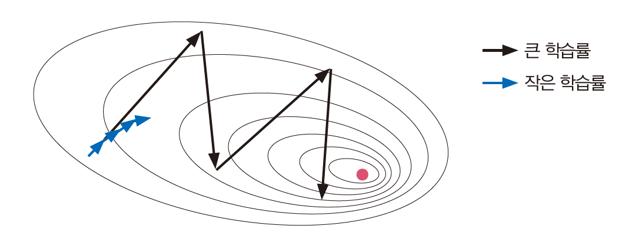

In [101]:
# 모멘텀의 학습률
# 그레디언트 는 최적점(최적의 해) 방향을 알려주지만. 이동량에 대한 정보가 없기때문에 작은 학습률을 곱해서
# 조금씩 보수적으로 이동
# 학습률이 너무 작으면 시간이 과다, 너무크면 진동이 일어날 가능성
Image("https://raw.githubusercontent.com/bigdataleeky/python/main/image/46.PNG", width=500)

In [102]:
#적응적 학습률
#  상황에 맞게 학습률을 조정하는 방법
# Adagrad : 이전 그레이던트를 누적한정보를 이용하여  학습률을 적응적으로 설정 
# RMSProp : 이전 그레이던트를 누적할때 오래된 정보의 영향을 줄이는 정책
# Adam : RMSProp에 위에있는 "모멘텀을 적용한 SGD" 수식을 적용

In [104]:
from tensorflow.keras.optimizers import Adagrad, RMSprop, Adam
adgrad = Adagrad()
rmsprop = RMSprop()
adam = Adam()

In [105]:
adgrad.get_config(), rmsprop.get_config(), adam.get_config()
#RMSProp에서 이전 그레디언트중에 오래된 값을 희석시키는 비율이 rho 매개변수 이고 결국 
# Adagrad + rho

# Adam은 Adagrad 와 RMSProp의 모든기능을 사용하고 조절가능하며 + 모멘텀의 기능이 추가
# beta_1 이 모멘텀
# beta_2가 RMSProp의 rho 이다

# 결론
# 기본 옵티마이저  Adagrad
# RMSProp = Adagrad + rho       This implementation of RMSprop uses plain momentum, not Nesterov momentum.
# Adam  RMSProp + beta1(모멘텀) +  beta2(RMSProp의 rho)

({'name': 'Adagrad',
  'learning_rate': 0.001,
  'decay': 0.0,
  'initial_accumulator_value': 0.1,
  'epsilon': 1e-07},
 {'name': 'RMSprop',
  'learning_rate': 0.001,
  'decay': 0.0,
  'rho': 0.9,
  'momentum': 0.0,
  'epsilon': 1e-07,
  'centered': False},
 {'name': 'Adam',
  'learning_rate': 0.001,
  'decay': 0.0,
  'beta_1': 0.9,
  'beta_2': 0.999,
  'epsilon': 1e-07,
  'amsgrad': False})

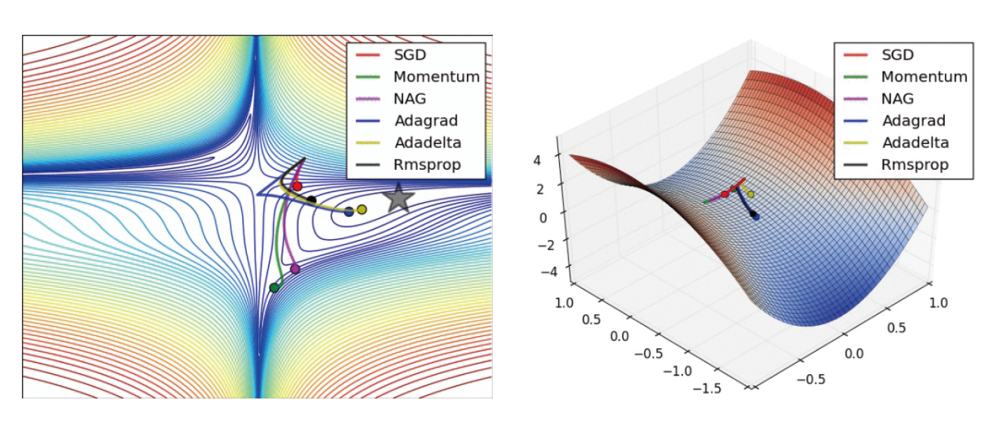

In [107]:
# 적응적 합습률을적용한 옵티마이저의 특성
Image("https://raw.githubusercontent.com/bigdataleeky/python/main/image/47.PNG", width=700)
# https://cs231n.github.io/neural-networks-3/

In [108]:
# 성능비교.... SGD, Adam. Adagrad RMSProop

In [111]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD ,Adam, Adagrad, RMSprop

In [112]:
(x_train,y_train),(x_target,y_target) = fashion_mnist.load_data()
x_train =x_train.reshape(-1,28*28)
x_target = x_target.reshape(-1,28*28)
x_train = x_train/255.0
x_target = x_target/255.0
y_train = tf.keras.utils.to_categorical(y_train,10)
y_target = tf.keras.utils.to_categorical(y_target,10)

batch_size = 256
n_epoch = 30

#모델 설계를 반환해 주는 함수
def build_model():
    model = Sequential()
    model.add(Dense(units=n_hidden1,activation='ReLU',input_shape=(n_input,)) )
    model.add(Dense(units=n_hidden2,activation='ReLU'))
    model.add(Dense(units=n_hidden3,activation='ReLU'))
    model.add(Dense(units=n_hidden4,activation='ReLU'))
    model.add(Dense(units=n_output,activation='softmax'))
    return model;


In [113]:
sgd_model = build_model()
adam_model = build_model()
rmsprop_model = build_model()
adagrad_model = build_model()

In [114]:
sgd_model.compile(loss = ls.categorical_crossentropy,optimizer=SGD(),metrics=['accuracy'])
adam_model.compile(loss = ls.categorical_crossentropy,optimizer=Adam(),metrics=['accuracy'])
rmsprop_model.compile(loss = ls.categorical_crossentropy,optimizer=RMSprop(),metrics=['accuracy'])
adagrad_model.compile(loss = ls.categorical_crossentropy,optimizer=Adagrad(),metrics=['accuracy'])

In [ ]:
sgd_model_hist = sgd_model.fit(x_train,y_train, batch_size=batch_size,
                               epochs=n_epoch,validation_data=(x_target,y_target),verbose=2)
adam_model_hist=adam_model.fit(x_train,y_train, batch_size=batch_size,
                               epochs=n_epoch,validation_data=(x_target,y_target),verbose=2)
rmsprop_model_hist=rmsprop_model.fit(x_train,y_train, batch_size=batch_size,
                               epochs=n_epoch,validation_data=(x_target,y_target),verbose=2)
adagrad_model_hist=adagrad_model.fit(x_train,y_train, batch_size=batch_size,
                               epochs=n_epoch,validation_data=(x_target,y_target),verbose=2)

Epoch 1/30
235/235 - 4s - loss: 1.3521 - accuracy: 0.6089 - val_loss: 0.8739 - val_accuracy: 0.6903 - 4s/epoch - 19ms/step
Epoch 2/30
235/235 - 4s - loss: 0.7173 - accuracy: 0.7628 - val_loss: 0.6846 - val_accuracy: 0.7510 - 4s/epoch - 17ms/step
Epoch 3/30
235/235 - 4s - loss: 0.5968 - accuracy: 0.7987 - val_loss: 0.6685 - val_accuracy: 0.7638 - 4s/epoch - 17ms/step
Epoch 4/30
235/235 - 4s - loss: 0.5413 - accuracy: 0.8150 - val_loss: 0.5366 - val_accuracy: 0.8114 - 4s/epoch - 19ms/step
Epoch 5/30
235/235 - 4s - loss: 0.5052 - accuracy: 0.8242 - val_loss: 0.5213 - val_accuracy: 0.8139 - 4s/epoch - 19ms/step
Epoch 6/30
235/235 - 5s - loss: 0.4846 - accuracy: 0.8303 - val_loss: 0.4896 - val_accuracy: 0.8273 - 5s/epoch - 21ms/step
Epoch 7/30
